# Problem statement
- Implement SGD Classifier with Logloss and L2 regularization Using SGD without using sklearn's SGD function and at the end compare our implementation with the sklearn's implementation...

<font color='red'> Importing packages</font>

In [373]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import math

<font color='red'>Creating custom dataset</font>

In [374]:

X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)
# make_classification is used to create custom dataset 
# Please check this link (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) for more details

In [375]:
X.shape, y.shape

((50000, 15), (50000,))

<font color='red'>Splitting data into train and test </font>

In [376]:

# you need not standardize the data as it is already standardized
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [377]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

# <font color='red' size=5>SGD classifier</font>

In [378]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf
# Please check this documentation (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) 

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [379]:
clf.fit(X=X_train, y=y_train) # fitting our model

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

C:\Users\natar\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [380]:
clf.coef_, clf.coef_.shape, clf.intercept_
#clf.coef_ will return the weights
#clf.coef_.shape will return the shape of weights
#clf.intercept_ will return the intercept term

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))

# Custom implementation of SGD classifier

<font color='blue'>Initialize weights </font>

In [381]:
def initialize_weights(row_vector):
    ''' In this function, we will initialize our weights and bias'''
    # zeros_like function to initialize zero: https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    w=np.zeros_like(row_vector)
    b=0      #initializing bias to zero
    return w,b

In [382]:
dim=X_train[0] 
w,b = initialize_weights(X_train[0])
print('w =',(w))
print('b =',str(b))

w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = 0


<font color='blue'>Compute sigmoid </font>

$sigmoid(z)= 1/(1+exp(-z))$

In [384]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    if z >= 0:                          #to avoid overflow problem : referene taken from: https://developer.ibm.com/articles/implementing-logistic-regression-from-scratch-in-python/
        z = np.exp(-z)            
        return 1 / (1 + z)
    else:
        z = np.exp(z)
        return z / (1 + z)

<font color='blue'> Compute loss </font>

$log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$

In [386]:
def logloss(y_true,y_pred):
    #while dealing with numpy arrays you can use vectorized operations for quicker calculations as compared to using loops
    #https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/VectorizedOperations.html
    #https://www.geeksforgeeks.org/vectorized-operations-in-numpy/

    loss =-np.mean(y_true*(np.log10(y_pred+1e-9)) + (1-y_true)*np.log10(1-y_pred+1e-9))   #to avoid division by zero error add 1e-9:reference taken from- #https://developer.ibm.com/articles/implementing-logistic-regression-from-scratch-in-python/
    return loss

<font color='blue'>Compute gradient w.r.to  'w' </font>

$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)}$ <br>

In [388]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    dw = x*(y-sigmoid(np.dot(w.T,x)+b))+((alpha/N)*w)
    return dw

<font color='blue'>Compute gradient w.r.to 'b' </font>

$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t})$

In [390]:
def gradient_db(x,y,w,b):
     '''In this function, we will compute gradient w.r.to b '''
     db = y-sigmoid(np.dot(w,x)+b)   
     return db

In [392]:
# prediction function used to compute predicted_y given the dataset X
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        predict.append(sigmoid(z))
    return np.array(predict)


<font color='blue'> Implementing logistic regression</font>

In [393]:
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
     
    train_loss = []
    test_loss = []
    w,b = initialize_weights(X_train[0]) # Initialize the weights
    #code to perform SGD
    for i in range(epochs):                           # for every epoch
        for idx,x in enumerate(X_train) :             # for every data point(X_train,y_train)
            dw=gradient_dw(x,y_train[idx],w,b,alpha,len(X_train))  #computing gradient w.r.to w 
            db=gradient_db(x,y_train[idx],w,b)        #computing gradient w.r.to b 
            w+=eta0*dw                                #update w  #Here eta0 is learning rate
            b+=eta0*db                                #update b
            
        y_pred_tr=pred(w,b,X_train)           #preding y for the given x_train using logistic function
        tr_loss=logloss(y_train,y_pred_tr)    #calculating log loss for train datapoints
        train_loss.append(tr_loss)
        
        y_pred_te=pred(w,b,X_test)            #preding y for the given x_test using logistic function
        te_loss=logloss(y_test,y_pred_te)     #calculating log loss for test datapoints
        test_loss.append(te_loss)
        if i>2:
            if train_loss[-1]-train_loss[-2] <= 1e-3:     #if the first 3 decimal places of train loss does not change for the consequent epoch,stop the training process since data is fitted to model very well
                break

    return w,b,train_loss,test_loss

In [394]:
alpha=0.001
eta0=0.001
N=len(X_train)
epochs=20
w,b,train_loss,test_loss=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

In [395]:
#print the value of weights w and bias b
print(w)
print(b)

[-0.41395135  0.19245248 -0.1500517   0.32635332 -0.22516469  0.58646629
 -0.42720474 -0.10028062  0.2148384   0.15555088  0.17880941 -0.01318672
 -0.0649683   0.36313892 -0.00985027]
-0.9016634051738529


In [396]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept

w-clf.coef_, b-clf.intercept_

(array([[ 0.00941556,  0.00697683, -0.00146134, -0.01509075, -0.01697799,
          0.02630051,  0.02522009, -0.00619249,  0.0055652 , -0.02529038,
         -0.0182425 , -0.01740588,  0.0146354 ,  0.0246109 , -0.03251748]]),
 array([-0.04852511]))

## <font color='red'>Goal of this project</font>

Compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in order of 10^-2

<font color='red'>Grader function - 1  </font>

In [397]:
#this grader function should return True
#the difference between custom weights and clf.coef_ should be less than or equal to 0.05
def differece_check_grader(w,b,coef,intercept):
    val_array=np.abs(np.array(w-coef))
    assert(np.all(val_array<=0.05))
    print('The custom weights are correct')
    return True
differece_check_grader(w,b,clf.coef_,clf.intercept_)   

The custom weights are correct


True

<font color='blue'>Plot train and test loss vs epochs </font>

plot epoch number on X-axis and loss on Y-axis and make sure that the curve is converging

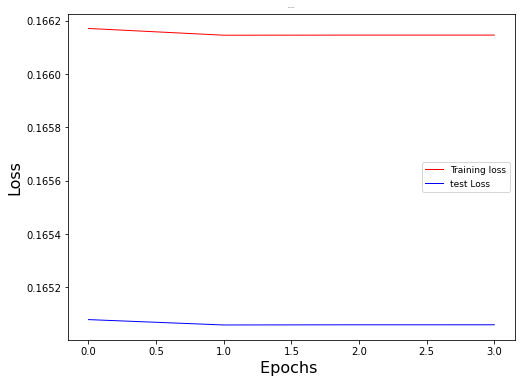

In [398]:
#reference taken from :https://www.oreilly.com/library/view/machine-learning-with/9781787121515/cf4693e9-207a-4f74-826c-8190c3c8de97.xhtml
from matplotlib import pyplot as plt 
plt.figure(figsize=[8,6])
plt.plot(test_loss,'r',linewidth=1.0)
plt.plot(train_loss,'b',linewidth=1.0)
plt.legend(['Training loss', 'test Loss'],fontsize=9)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=1)
plt.show()

the data is well fitted with the model in few epochs itself.we get the **train log loss** of **0.1650592828382934** and **test log loss** of  **0.16614668451454206**